In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [108]:
#load dataset
df=pd.read_csv('/content/AirCraft_Noise_data.csv')

In [109]:
df.head()

,Year,Month,Community,Total Complaints,Total Number of Callers,data_loaded_at
0,2022,12,Soquel,"3,722",27,2023/09/01 04:13:58 PM
1,2019,10,Moraga,196,4,2023/09/01 04:13:58 PM
2,2019,10,Berkeley,"1,656",5,2023/09/01 04:13:58 PM
3,2019,8,Brisbane,"3,225",22,2023/09/01 04:13:58 PM
4,2019,11,Pacifica,"2,062",24,2023/09/01 04:13:58 PM


#***Exploratory Data Analysis (EDA)***

In [110]:
#data shape
df.shape

(7232, 6)

In [111]:
#check null values
df.isnull().sum()

,0
Year,0
Month,0
Community,0
Total Complaints,1
Total Number of Callers,1
data_loaded_at,0


In [112]:
#drop the null column
df.dropna(inplace=True)

In [113]:
#check the duplicated dataset
df.duplicated().sum()

0

In [114]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7231 entries, 0 to 7231
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     7231 non-null   int64 
 1   Month                    7231 non-null   int64 
 2   Community                7231 non-null   object
 3   Total Complaints         7231 non-null   object
 4   Total Number of Callers  7231 non-null   object
 5   data_loaded_at           7231 non-null   object
dtypes: int64(2), object(4)
memory usage: 395.4+ KB


In [115]:
# Convert 'Total Complaints' to numeric (removing commas)
df['Total Complaints'] = df['Total Complaints'].str.replace(',', '').astype(int)

In [116]:
# Convert 'data_loaded_at' to datetime
df['data_loaded_at'] = pd.to_datetime(df['data_loaded_at'])

In [117]:
#convert number of caller in int
df['Total Number of Callers'] = df['Total Number of Callers'].str.replace(',','').astype(int)

In [118]:
# Convert 'Year' and 'Month' into a datetime format asign month day 1
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

In [119]:
df

,Year,Month,Community,Total Complaints,Total Number of Callers,data_loaded_at,Date
0,2022,12,Soquel,3722,27,2023-09-01 16:13:58,2022-12-01
1,2019,10,Moraga,196,4,2023-09-01 16:13:58,2019-10-01
2,2019,10,Berkeley,1656,5,2023-09-01 16:13:58,2019-10-01
3,2019,8,Brisbane,3225,22,2023-09-01 16:13:58,2019-08-01
4,2019,11,Pacifica,2062,24,2023-09-01 16:13:58,2019-11-01
...,...,...,...,...,...,...,...
7227,2021,6,East Palo Alto,110,1,2023-09-01 16:13:58,2021-06-01
7228,2023,1,Tiburon,1,1,2023-09-01 16:13:58,2023-01-01
7229,2022,6,Watsonville,88,1,2023-09-01 16:13:58,2022-06-01
7230,2023,2,Alameda,3,1,2023-09-01 16:13:58,2023-02-01


In [120]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               Year        Month  Total Complaints  Total Number of Callers  \
count  7231.000000  7231.000000       7231.000000              7231.000000   
mean   2016.349468     6.410317       2216.009819                37.572397   
min    2005.000000     1.000000          1.000000                 1.000000   
25%    2014.000000     3.000000          6.000000                 1.000000   
50%    2017.000000     6.000000         93.000000                 3.000000   
75%    2020.000000     9.000000        952.500000                11.000000   
max    2023.000000    12.000000      93498.000000             40859.000000   
std       4.863985     3.444915       6824.018263               624.374496   

                      data_loaded_at                           Date  
count                           7231                           7231  
mean   2023-09-01 16:13:58.000000256  2016-10-18 23:33:42.790761984  
min              2023-09-01 16:13:58            2005-01-01 00:00:

#Visual analysis

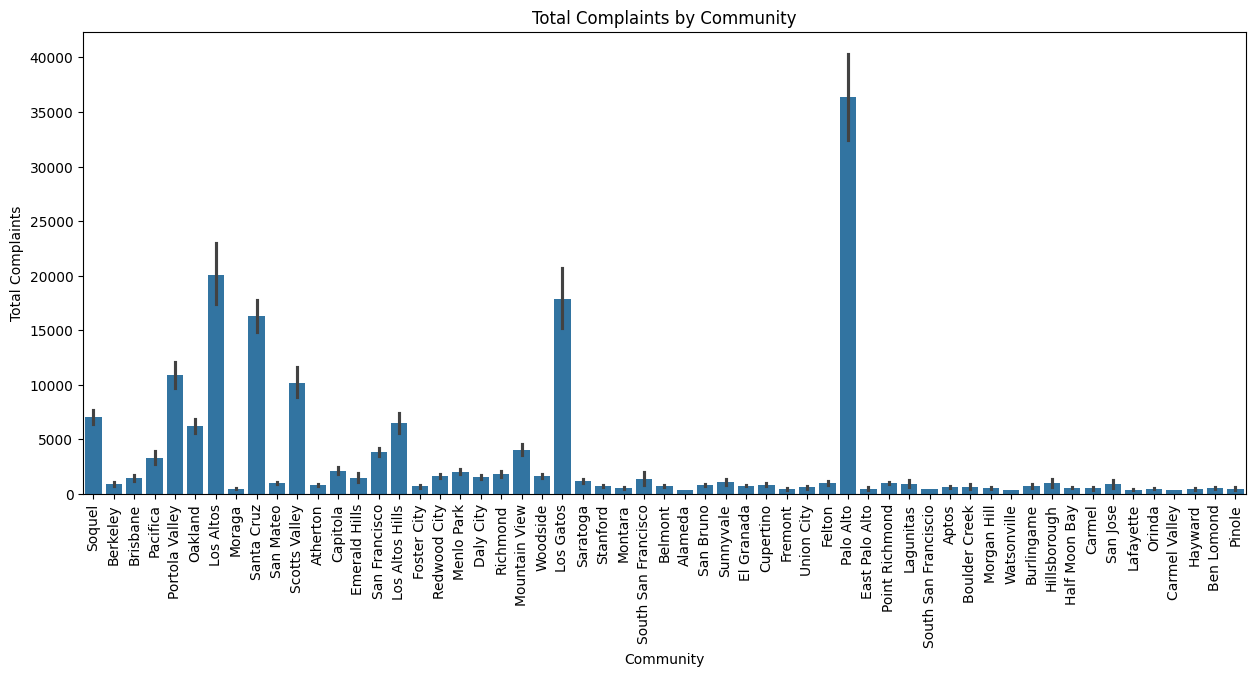

In [121]:
# Bar plot of complaints by community
# Filter the data for communities with complaints above 300
filtered_data = df[df['Total Complaints'] > 300]
plt.figure(figsize=(15, 6))
sns.barplot(data=filtered_data, x='Community', y='Total Complaints')
plt.title('Total Complaints by Community')
plt.xlabel('Community')
plt.ylabel('Total Complaints')
plt.xticks(rotation=90)
plt.show()

#group by year and month

In [122]:
# 4. Group by Year and Month
year_month_group = df.groupby(['Year', 'Month']).agg({
    'Total Complaints': 'sum',
    'Total Number of Callers': 'sum'
}).reset_index()

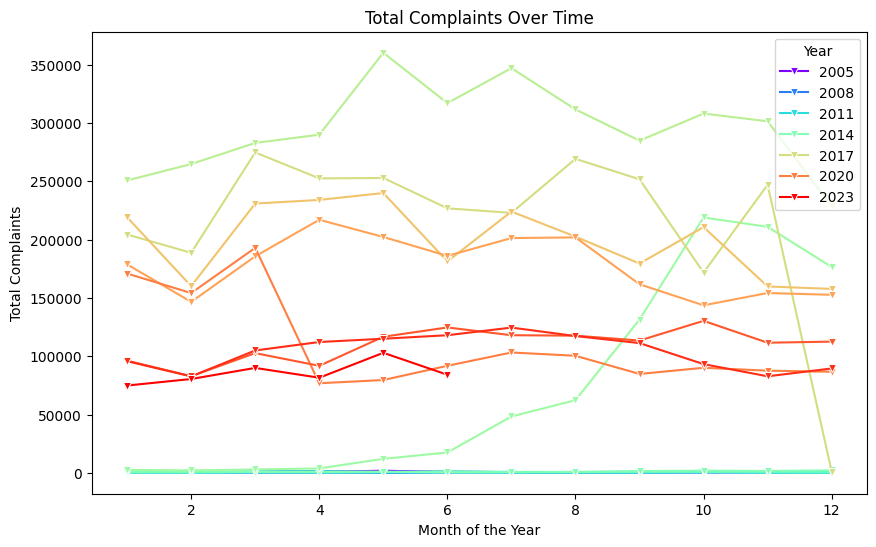

In [123]:
#Line plot of complaints over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_month_group, x='Month', y='Total Complaints', hue='Year', marker='v',palette='rainbow')
plt.title('Total Complaints Over Time')
plt.xlabel('Month of the Year')
plt.ylabel('Total Complaints')
plt.show()

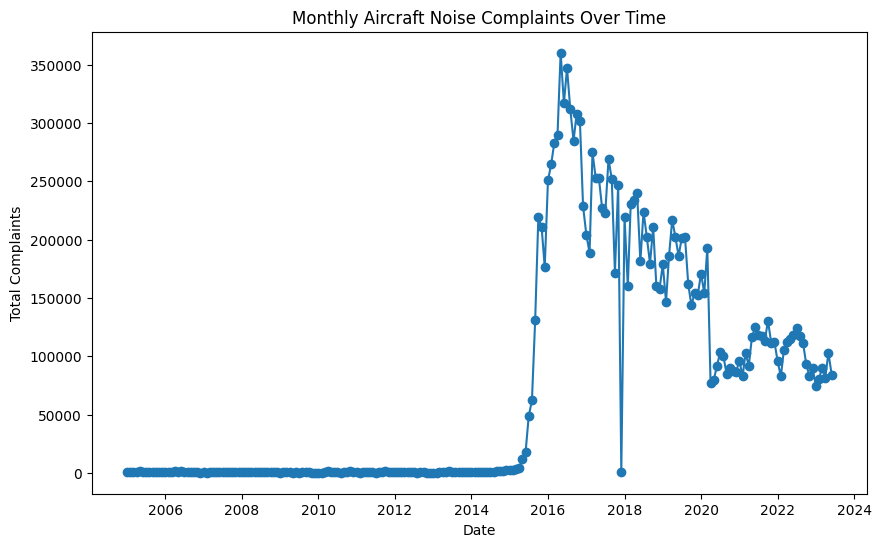

In [124]:
# Aggregate complaints by month (if you have multiple entries per month)
monthly_data = df.groupby('Date').agg({'Total Complaints': 'sum'})

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data, marker='o')
plt.title('Monthly Aircraft Noise Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.show()

In [125]:
df.columns

Index(['Year', 'Month', 'Community', 'Total Complaints',
       'Total Number of Callers', 'data_loaded_at', 'Date'],
      dtype='object')

#***correlation Features***

In [126]:
#Correlation analysis
correlation = df[['Total Complaints', 'Total Number of Callers','Month','Year']].corr()
print("\nCorrelation matrix:\n", correlation)


Correlation matrix:
                          Total Complaints  Total Number of Callers     Month  \
Total Complaints                 1.000000                 0.047143  0.000876   
Total Number of Callers          0.047143                 1.000000  0.056056   
Month                            0.000876                 0.056056  1.000000   
Year                             0.123693                 0.011295 -0.054421   

                             Year  
Total Complaints         0.123693  
Total Number of Callers  0.011295  
Month                   -0.054421  
Year                     1.000000  


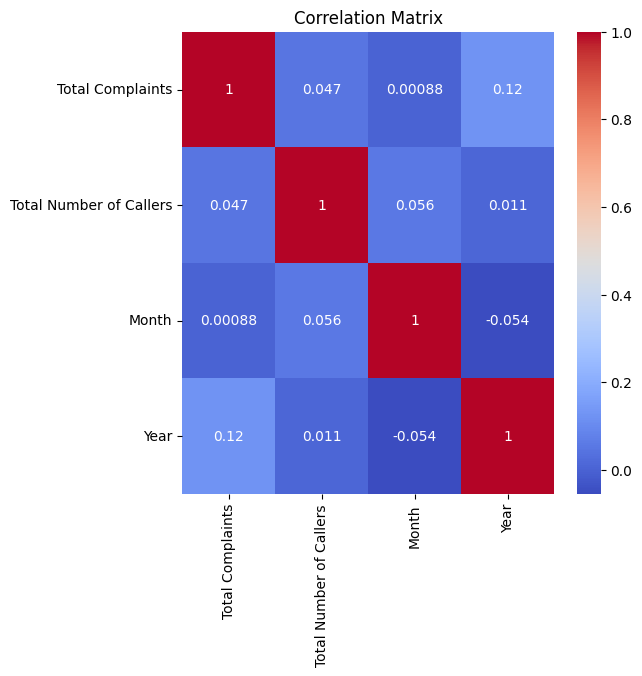

In [127]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [128]:
df

,Year,Month,Community,Total Complaints,Total Number of Callers,data_loaded_at,Date
0,2022,12,Soquel,3722,27,2023-09-01 16:13:58,2022-12-01
1,2019,10,Moraga,196,4,2023-09-01 16:13:58,2019-10-01
2,2019,10,Berkeley,1656,5,2023-09-01 16:13:58,2019-10-01
3,2019,8,Brisbane,3225,22,2023-09-01 16:13:58,2019-08-01
4,2019,11,Pacifica,2062,24,2023-09-01 16:13:58,2019-11-01
...,...,...,...,...,...,...,...
7227,2021,6,East Palo Alto,110,1,2023-09-01 16:13:58,2021-06-01
7228,2023,1,Tiburon,1,1,2023-09-01 16:13:58,2023-01-01
7229,2022,6,Watsonville,88,1,2023-09-01 16:13:58,2022-06-01
7230,2023,2,Alameda,3,1,2023-09-01 16:13:58,2023-02-01


In [129]:
# Aggregate data by Date and Community
df_grouped = df.groupby(['Date', 'Community']).agg({'Total Complaints': 'sum'}).reset_index()

#Pivot function use to forecast for each community separately

In [130]:
# Pivot table to have communities as columns ( to forecast for each community separately)
df_pivot = df_grouped.pivot(index='Date', columns='Community', values='Total Complaints').fillna(0)

In [141]:
df_pivot

Community,94402,Alameda,Alamo,Albany,Antioch,Aptos,Aromas,Atherton,Auburn,Belmont,...,Sunnyvale,Sunol,The Sea Ranch,Tiburon,Tracy,Union City,Walnut Creek,Watsonville,West Menlo Park,Woodside
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,0.0,7.0,0.0,0.0,0.0,0.0,0.0,242.0,0.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-01,0.0,3.0,0.0,0.0,0.0,0.0,0.0,292.0,0.0,118.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,12.0
2005-03-01,0.0,3.0,0.0,0.0,0.0,0.0,0.0,279.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2005-04-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
2005-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,0.0,3.0,0.0,0.0,0.0,2.0,0.0,23.0,0.0,136.0,...,954.0,0.0,0.0,0.0,0.0,821.0,1.0,48.0,0.0,1074.0
2023-03-01,0.0,12.0,1.0,0.0,0.0,0.0,0.0,45.0,0.0,151.0,...,2156.0,0.0,0.0,0.0,0.0,253.0,0.0,62.0,0.0,1113.0
2023-04-01,0.0,0.0,0.0,0.0,0.0,6.0,0.0,51.0,0.0,21.0,...,583.0,0.0,0.0,0.0,0.0,222.0,0.0,61.0,0.0,1369.0


#split the dataset train data and test data

In [131]:
# Train-test split
train_size = int(len(df_pivot) * 0.8)
train, test = df_pivot[:train_size], df_pivot[train_size:]

In [137]:
# Train ARIMA model for each community
model_fits = {}
for community in df_pivot.columns:
    model = ARIMA(train[community], order=(5, 1, 0))
    model_fits[community] = model.fit()

In [138]:
# Forecasting
forecasts = pd.DataFrame()
for community, model_fit in model_fits.items():
    forecast = model_fit.forecast(steps=len(test))
    forecasts[community] = forecast

# Evaluate the model performance on basic of community

In [139]:
# Evaluate the model performance
mse_scores = {}
for community in df_pivot.columns:
    mse = mean_squared_error(test[community], forecasts[community])
    mse_scores[community] = mse
    print(f"Mean Squared Error for {community}: {mse}")

Mean Squared Error for 94402: 0.022222222222222223
Mean Squared Error for Alameda: 15862.037043387494
Mean Squared Error for Alamo: 0.8222222222222222
Mean Squared Error for Albany: 0.022222222222222223
Mean Squared Error for Antioch: 1.6504205688375343e-107
Mean Squared Error for Aptos: 79950.61256398552
Mean Squared Error for Aromas: 0.0
Mean Squared Error for Atherton: 568810.9222576376
Mean Squared Error for Auburn: 4.812733419052292e-204
Mean Squared Error for Belmont: 49861.14795933921
Mean Squared Error for Belvedere: 0.0
Mean Squared Error for Belvedere-Tiburon: 2.551275298856588e-174
Mean Squared Error for Ben Lomond: 736.1286467121433
Mean Squared Error for Benicia: 8.022222222222222
Mean Squared Error for Berkeley: 2548703.244982618
Mean Squared Error for Bolinas: 1.213257159792221e-35
Mean Squared Error for Bonny Doon: 4886.803719356161
Mean Squared Error for Boulder Creek: 26611.2319729198
Mean Squared Error for Brentwood: 3.2222222222222223
Mean Squared Error for Brisbane

#check the forecast some of community in chart

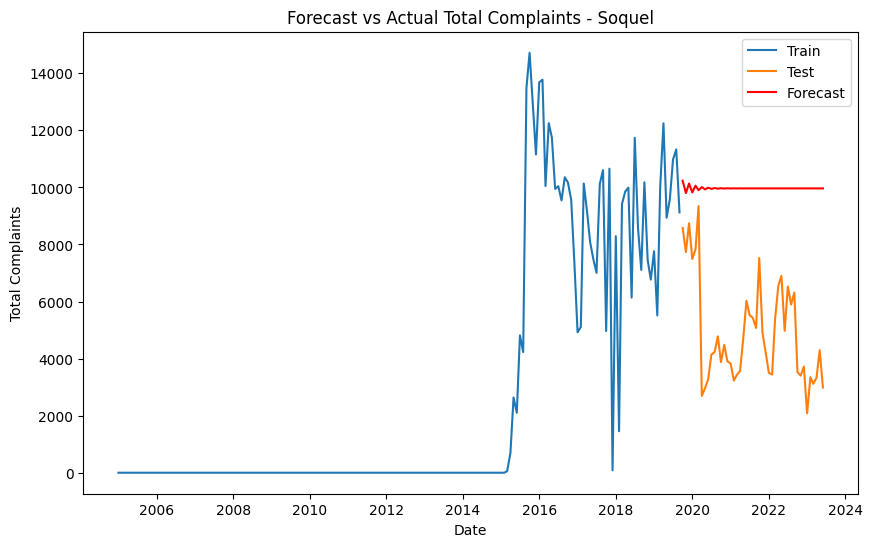

In [135]:
# Plot actual vs forecasted values for one of the communities use Soquel community
community_to_plot = 'Soquel'
plt.figure(figsize=(10, 6))
plt.plot(train.index, train[community_to_plot], label='Train')
plt.plot(test.index, test[community_to_plot], label='Test')
plt.plot(test.index, forecasts[community_to_plot], label='Forecast', color='red')
plt.title(f'Forecast vs Actual Total Complaints - {community_to_plot}')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.legend()
plt.show()

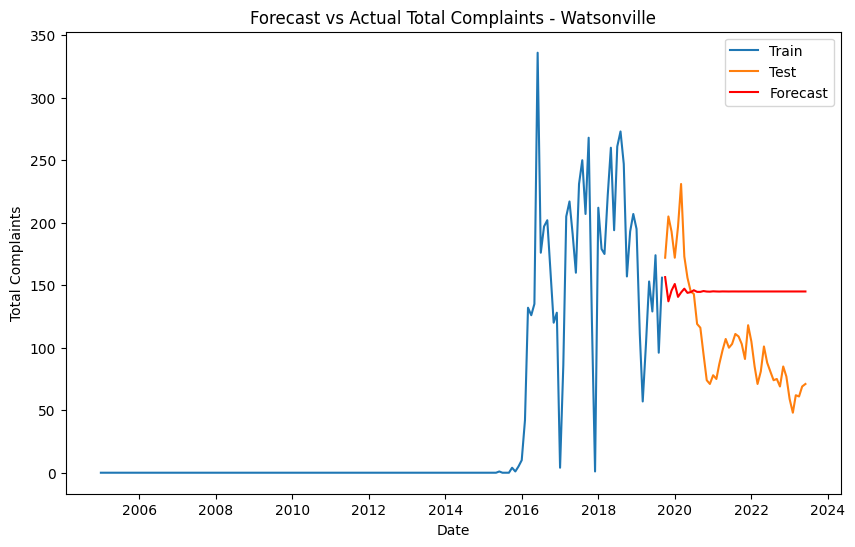

In [142]:
# Plot actual vs forecasted values for one of the communities use Watsonville community
community_to_plot = 'Watsonville'
plt.figure(figsize=(10, 6))
plt.plot(train.index, train[community_to_plot], label='Train')
plt.plot(test.index, test[community_to_plot], label='Test')
plt.plot(test.index, forecasts[community_to_plot], label='Forecast', color='red')
plt.title(f'Forecast vs Actual Total Complaints - {community_to_plot}')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.legend()
plt.show()

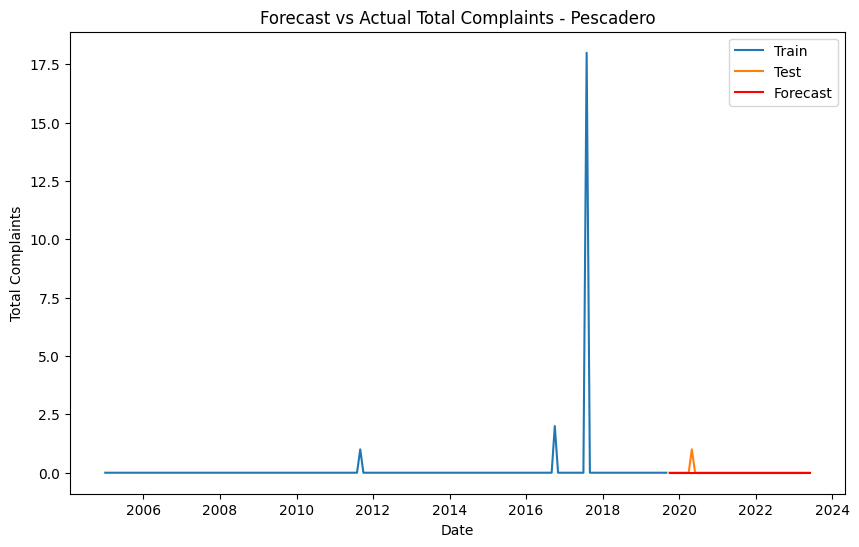

In [143]:
# Plot actual vs forecasted values for one of the communities use Pescadero community
community_to_plot = 'Pescadero'
plt.figure(figsize=(10, 6))
plt.plot(train.index, train[community_to_plot], label='Train')
plt.plot(test.index, test[community_to_plot], label='Test')
plt.plot(test.index, forecasts[community_to_plot], label='Forecast', color='red')
plt.title(f'Forecast vs Actual Total Complaints - {community_to_plot}')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.legend()
plt.show()

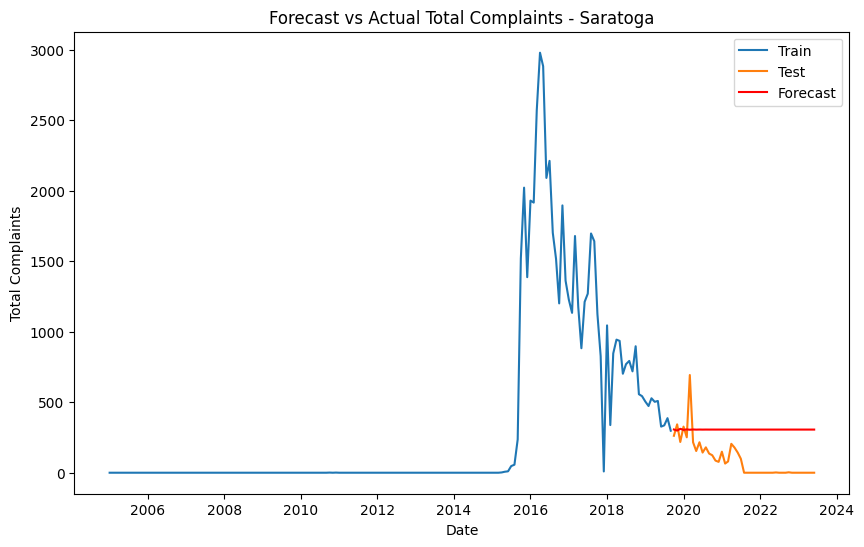

In [145]:
# Plot actual vs forecasted values for one of the communities use Saratoga community
community_to_plot = 'Saratoga'
plt.figure(figsize=(10, 6))
plt.plot(train.index, train[community_to_plot], label='Train')
plt.plot(test.index, test[community_to_plot], label='Test')
plt.plot(test.index, forecasts[community_to_plot], label='Forecast', color='red')
plt.title(f'Forecast vs Actual Total Complaints - {community_to_plot}')
plt.xlabel('Date')
plt.ylabel('Total Complaints')
plt.legend()
plt.show()

In [140]:
# Forecast future complaints for a community (e.g., Soquel)
future_forecast = model_fits[community_to_plot].forecast(steps=12)
print(f"Future Forecast for {community_to_plot} (Next 12 Months):")
print(future_forecast)

Future Forecast for Soquel (Next 12 Months):
2019-10-01    10234.298857
2019-11-01     9801.850228
2019-12-01    10134.733512
2020-01-01     9824.017400
2020-02-01    10061.064604
2020-03-01     9902.777886
2020-04-01    10011.594500
2020-05-01     9931.656685
2020-06-01     9990.591032
2020-07-01     9948.181691
2020-08-01     9978.446282
2020-09-01     9956.694179
Freq: MS, Name: predicted_mean, dtype: float64
